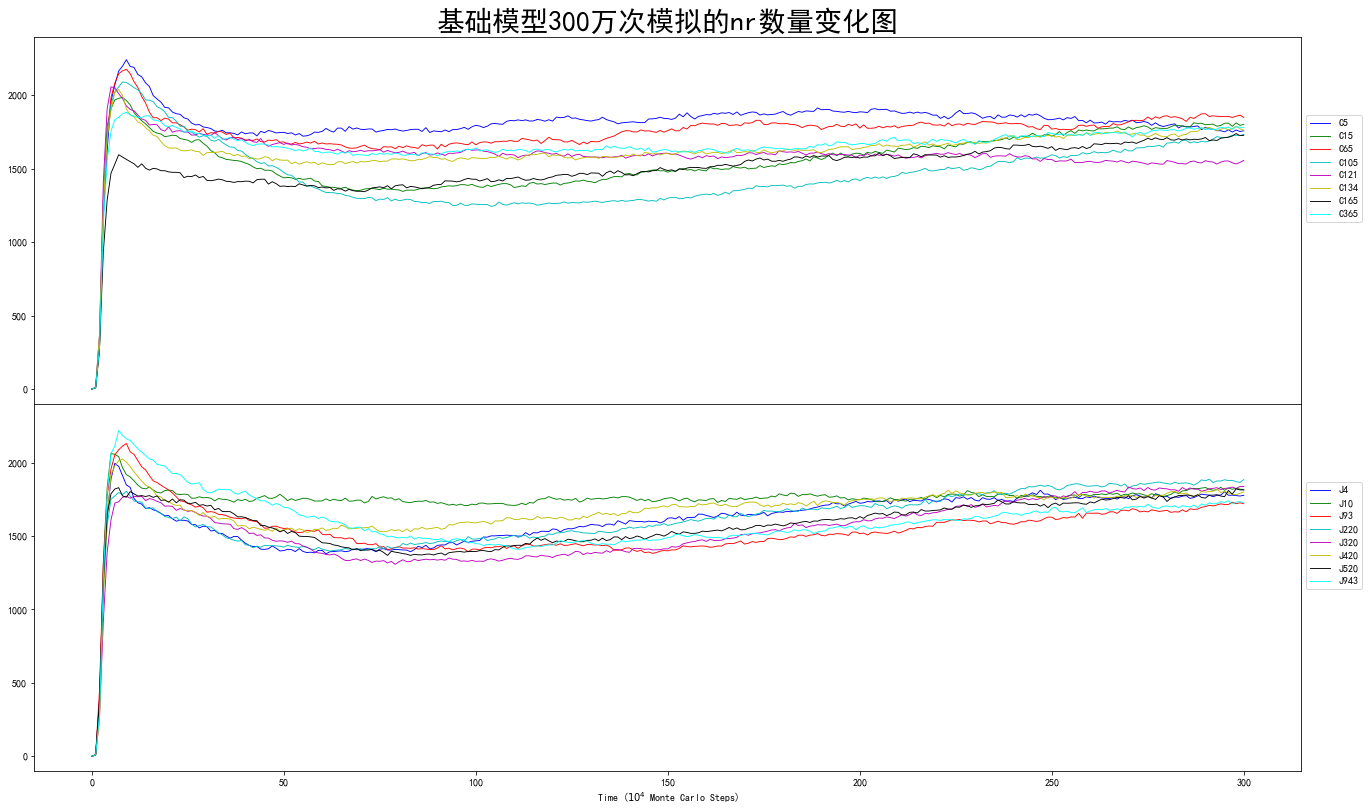

In [31]:
import matplotlib.pyplot as plt
import re
import matplotlib.gridspec as gridspec
plt.rcParams['font.sans-serif'] = ['SimHei']

def getY(fp,yl,y_pat,sc):
    with open(fp,'r',encoding='utf-8')as f:
        for i in range(sc):
            yl.append(float(y_pat.search(f.readline()).group('s')))

def getX(y,x):
    for i in range(len(y)):
        x.append(i)

def draw(x,y,color,Label,direction):
    # 绘制图形
    #ax11.plot(x,y,marker='o',markersize=4,ls='',c=color,label=Label)
    # 添加图例
    #ax11.legend(bbox_to_anchor=(1,0.6), numpoints=1, fontsize=10)
    # 设置坐标轴范围
    if direction==1:
        ax11.plot(x,y,c=color,linewidth=0.9,label=Label)
        ax11.legend(bbox_to_anchor=(1,0.80), numpoints=1, fontsize=10)
    else:
        ax12.plot(x,y,c=color,linewidth=0.9,label=Label)
        ax12.legend(bbox_to_anchor=(1,0.80), numpoints=1, fontsize=10)
        
def drawAll(file_name,para_pat,direction,Label,color):
    y=[]
    getY(file_name,y,para_pat,scale)
    x=[]
    getX(y,x)
    draw(x,y,color,Label,direction)

scale=301

# 定义子图布局
fig=plt.figure(figsize=[20,12])
top1=0.96
height1=0.425
top2=top1-height1
height2=0.425
gs11 = gridspec.GridSpec(1, 1) #(col,row)
gs11.update(bottom=top1-height1,top=top1,left=0.08, right=0.96) #gs1.update(bottom=0.48,top=0.8)
ax11 = plt.subplot(gs11[0, 0])
gs12 = gridspec.GridSpec(1, 1)
gs12.update(bottom=top2-height2,top=top2,left=0.08, right=0.96)
ax12 = plt.subplot(gs12[0, 0])

#颜色备用库
colors = ['b','g','r','c','m','y','k','cyan','lightgreen','darkred']
#画图所用文件
fileUp = ['C5.txt','C15.txt','C65.txt','C105.txt','C121.txt','C134.txt','C165.txt','C365.txt']
fileDown = ['J4.txt','J10.txt','J93.txt','J220.txt','J320.txt','J420.txt','J520.txt','J943.txt']

#匹配格式
para_pat=re.compile('nr=(?P<s>.+?),.+')

#画图
for i in range(len(fileUp)):
    drawAll(fileUp[i],para_pat,1,fileUp[i].split('.')[0],colors[i])
for i in range(len(fileDown)):
    drawAll(fileDown[i],para_pat,2,fileDown[i].split('.')[0],colors[i])

#坐标轴尺寸
ax11.set_ylim(-100, 2400)
ax12.set_ylim(-100, 2400)
ax12.set_xlabel('Time ($10^4$ Monte Carlo Steps)')

##################################
plt.title('基础模型300万次模拟的nr数量变化图', loc='center', fontsize=28, y=2)
plt.savefig('基础模型300万次模拟nr数量曲线图.png',dpi=600)
plt.show()


